In [1]:
import pandas as pd

In [2]:
customer_data = pd.read_csv('../data/Customer Data Set - Student 1 of 3.csv')
customer_data.head()

,CUSTOMERID,GENDER,AGE,INCOME,EXPERIENCE SCORE,LOYALTY GROUP,ENROLLMENT DATE,HOUSEHOLD SIZE,MARITAL STATUS
0,10001,0,64,"$133,498",5,enrolled,06-03-2013,4,Single
1,10002,0,42,"$94,475",9,notenrolled,NaN,6,Married
2,10003,0,40,"$88,610",9,enrolled,02-09-2010,5,Married
3,10004,0,38,"$84,313",8,enrolled,06-04-2015,1,Single
4,10005,0,30,"$51,498",3,notenrolled,NaN,1,Single


In [3]:
product_data = pd.read_csv('../data/Product Data Set - Student 2 of 3.csv', sep = '|')
product_data.head()

,PRODUCT CODE,PRODUCT CATEGORY,UNIT LIST PRICE
0,30001,HEALTH & BEAUTY,$7.45
1,30002,HEALTH & BEAUTY,$5.35
2,30003,HEALTH & BEAUTY,$5.49
3,30004,HEALTH & BEAUTY,$6.46
4,30005,HEALTH & BEAUTY,$7.33


In [4]:
transaction_data = pd.read_csv('../data/Transaction Data Set - Student 3 of 3.csv', sep = '|')
transaction_data.head()

,CUSTOMER NUM,PRODUCT NUM,QUANTITY PURCHASED,DISCOUNT TAKEN,TRANSACTION DATE,STOCKOUT
0,10114,30011,4,0.0,1/2/2015,0
1,10217,30016,3,0.0,1/2/2015,0
2,10224,30013,4,0.0,1/2/2015,0
3,10103,30012,3,0.2,1/2/2015,0
4,10037,30010,8,0.0,1/2/2015,0


## Data quality

clean the data

In [5]:
product_data['UNIT LIST PRICE'] = product_data['UNIT LIST PRICE'].map(lambda x: float(x.replace('$','')))

In [6]:
customer_data['INCOME'] = customer_data['INCOME'].map(lambda x: x.replace('$', ''))
customer_data['INCOME'] = customer_data['INCOME'].map(lambda x: int(x.replace(',','')))

In [7]:
# check for null values in all datasets
print(product_data.isnull().values.any())
print(transaction_data.isnull().values.any())
print(customer_data.isnull().values.any())

False
False
True


In [8]:
customer_data.columns[customer_data.isna().any()].to_list()

['ENROLLMENT DATE']

In [9]:
# replace all NaN values with 0
customer_data['ENROLLMENT DATE'] = customer_data['ENROLLMENT DATE'].fillna(0)

In [10]:
# combine tables that will give more information when combined
trans_products = transaction_data.merge(product_data, how = 'inner', left_on = 'PRODUCT NUM', right_on='PRODUCT CODE')
trans_products.head()

,CUSTOMER NUM,PRODUCT NUM,QUANTITY PURCHASED,DISCOUNT TAKEN,TRANSACTION DATE,STOCKOUT,PRODUCT CODE,PRODUCT CATEGORY,UNIT LIST PRICE
0,10114,30011,4,0.0,1/2/2015,0,30011,APPAREL,25.46
1,10086,30011,6,0.0,1/2/2015,0,30011,APPAREL,25.46
2,10174,30011,10,0.0,1/2/2015,0,30011,APPAREL,25.46
3,10401,30011,12,0.0,1/2/2015,0,30011,APPAREL,25.46
4,10216,30011,12,0.1,1/2/2015,0,30011,APPAREL,25.46


In [11]:
trans_products['TOTAL BOUGHT'] = trans_products['QUANTITY PURCHASED'] * trans_products['UNIT LIST PRICE'] * (1-trans_products['DISCOUNT TAKEN'])
trans_products.head()

,CUSTOMER NUM,PRODUCT NUM,QUANTITY PURCHASED,DISCOUNT TAKEN,TRANSACTION DATE,STOCKOUT,PRODUCT CODE,PRODUCT CATEGORY,UNIT LIST PRICE,TOTAL BOUGHT
0,10114,30011,4,0.0,1/2/2015,0,30011,APPAREL,25.46,101.840
1,10086,30011,6,0.0,1/2/2015,0,30011,APPAREL,25.46,152.760
2,10174,30011,10,0.0,1/2/2015,0,30011,APPAREL,25.46,254.600
3,10401,30011,12,0.0,1/2/2015,0,30011,APPAREL,25.46,305.520
4,10216,30011,12,0.1,1/2/2015,0,30011,APPAREL,25.46,274.968


**There were two important objectives that were set during the business understanding phase:**
    1. understanding the factors associated with the loyalty participation.
    2. understanding the factors associated with increased spending.
       

In [12]:
# finding out retailer's X best sellers
best_sellers = trans_products.groupby('PRODUCT CATEGORY').agg({'TOTAL BOUGHT': 'sum'}).sort_values('TOTAL BOUGHT', ascending = False)
best_sellers

,TOTAL BOUGHT
PRODUCT CATEGORY,
ELECTRONICS,1607192.422
APPAREL,936757.914
FOOD,96044.610
HEALTH & BEAUTY,54776.312


In retailer X's shop, elctronics sell best and Health and Beauty sell the worst.

In [13]:
# creating a table that will tell us more about our customers:
customer_prod_category = trans_products.groupby(['CUSTOMER NUM','PRODUCT CATEGORY']).agg({'TOTAL BOUGHT': 'sum'})
customer_prod_category[:10]

TOTAL BOUGHT
CUSTOMER NUM PRODUCT CATEGORY              
10001        APPAREL               4022.430
             ELECTRONICS           1601.315
             FOOD                    68.688
             HEALTH & BEAUTY       1134.337
10002        APPAREL               2312.509
             ELECTRONICS           2473.163
             FOOD                   276.779
10003        APPAREL               2887.382
             ELECTRONICS           5414.418
             FOOD                   260.640

In [14]:
customer_prod_category = customer_prod_category.reset_index()
customer_prod_category.head()

,CUSTOMER NUM,PRODUCT CATEGORY,TOTAL BOUGHT
0,10001,APPAREL,4022.430
1,10001,ELECTRONICS,1601.315
2,10001,FOOD,68.688
3,10001,HEALTH & BEAUTY,1134.337
4,10002,APPAREL,2312.509


In [15]:
# reorganize as per customer
customer_pivot = customer_prod_category.pivot(index='CUSTOMER NUM', columns='PRODUCT CATEGORY', values = 'TOTAL BOUGHT')
customer_pivot.head()

PRODUCT CATEGORY,APPAREL,ELECTRONICS,FOOD,HEALTH & BEAUTY
CUSTOMER NUM,,,,
10001,4022.430,1601.315,68.688,1134.337
10002,2312.509,2473.163,276.779,NaN
10003,2887.382,5414.418,260.640,NaN
10004,3637.213,1840.211,45.270,NaN
10005,213.512,NaN,NaN,NaN


In [16]:
customer_pivot = customer_pivot.fillna(0)
customer_pivot.head()

PRODUCT CATEGORY,APPAREL,ELECTRONICS,FOOD,HEALTH & BEAUTY
CUSTOMER NUM,,,,
10001,4022.430,1601.315,68.688,1134.337
10002,2312.509,2473.163,276.779,0.000
10003,2887.382,5414.418,260.640,0.000
10004,3637.213,1840.211,45.270,0.000
10005,213.512,0.000,0.000,0.000


Business understanding

Data understanding

Data preparation, we're combining tables that will help us work better and create an ultimate table or ultimate tables. 

Modelling

Evaluation 

Feedback/Report on way forward

In [17]:
# calculate transaction per customer:
customer_total_spent = trans_products.groupby('CUSTOMER NUM').agg({'TOTAL BOUGHT': 'sum'})
customer_total_spent.head()

,TOTAL BOUGHT
CUSTOMER NUM,
10001,6826.770
10002,5062.451
10003,8562.440
10004,5522.694
10005,213.512


In [18]:
# create a table that each customer alongside what they bought in each category and how much they've spent in total.
customer_transactions = customer_pivot.merge(customer_total_spent, how = 'inner', left_index=True, right_index=True)
customer_transactions = customer_transactions.rename(columns = {'TOTAL BOUGHT':'TOTAL SPENT'})
customer_transactions.head()

,APPAREL,ELECTRONICS,FOOD,HEALTH & BEAUTY,TOTAL SPENT
CUSTOMER NUM,,,,,
10001,4022.430,1601.315,68.688,1134.337,6826.770
10002,2312.509,2473.163,276.779,0.000,5062.451
10003,2887.382,5414.418,260.640,0.000,8562.440
10004,3637.213,1840.211,45.270,0.000,5522.694
10005,213.512,0.000,0.000,0.000,213.512


In [19]:
# combine customer data table with customer transactions to get a wider view.
customer_all_view = customer_data.merge(customer_transactions, left_on='CUSTOMERID', right_index = True)
customer_all_view.head()

,CUSTOMERID,GENDER,AGE,INCOME,EXPERIENCE SCORE,LOYALTY GROUP,ENROLLMENT DATE,HOUSEHOLD SIZE,MARITAL STATUS,APPAREL,ELECTRONICS,FOOD,HEALTH & BEAUTY,TOTAL SPENT
0,10001,0,64,133498,5,enrolled,06-03-2013,4,Single,4022.430,1601.315,68.688,1134.337,6826.770
1,10002,0,42,94475,9,notenrolled,0,6,Married,2312.509,2473.163,276.779,0.000,5062.451
2,10003,0,40,88610,9,enrolled,02-09-2010,5,Married,2887.382,5414.418,260.640,0.000,8562.440
3,10004,0,38,84313,8,enrolled,06-04-2015,1,Single,3637.213,1840.211,45.270,0.000,5522.694
4,10005,0,30,51498,3,notenrolled,0,1,Single,213.512,0.000,0.000,0.000,213.512


Now proceed to explore what causes loyalty and increased spending in retailer X's store.


### Loyalty analysis

In [20]:
loyalty_table = pd.crosstab(customer_all_view['GENDER'], customer_all_view['LOYALTY GROUP'])
loyalty_table

LOYALTY GROUP,enrolled,notenrolled
GENDER,,
0,131,120
1,133,116


In [21]:
import matplotlib.pyplot as plt

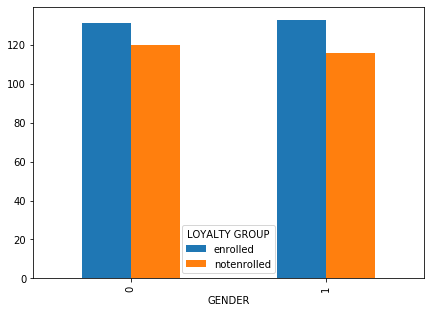

In [22]:
loyalty_table.plot(kind = 'bar', figsize = (7,5))

Gender doesn't seem to affect loyalty at all, we have almost as many people enrolled as not enrolled in both genders.

Text(0, 0.5, 'number of customers')

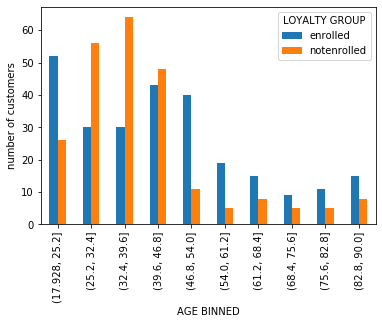

In [23]:
# Age vs Loyalty
# since age is a continuous variable, put them in bins/categories.
customer_all_view['AGE BINNED'] = pd.cut(customer_all_view['AGE'], 10)
loyalty_table = pd.crosstab(customer_all_view['AGE BINNED'], customer_all_view['LOYALTY GROUP'])
loyalty_table.plot(kind = 'bar')
plt.ylabel('number of customers')

customers between the ages of 25.2 to 46.8 seem not to be interested in the loyalty program. This is seen from the higher number or 'not enrolled' people compared to those 'enrolled' in that age group. Age is therefore a factor that affects loyalty.

Text(0, 0.5, 'Income')

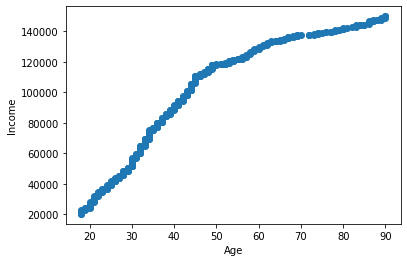

In [24]:
plt.scatter(customer_all_view['AGE'], customer_all_view['INCOME'])
plt.xlabel("Age")
plt.ylabel("Income")

Income and age are positively correlated, almost one and the same, we can assume that income and age will have the same relationship with loyalty.

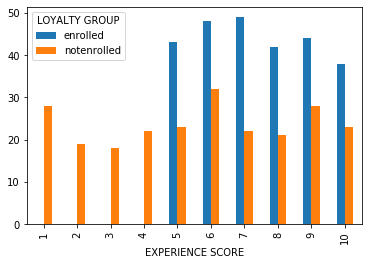

In [25]:
# Experience score vs loyalty
loyalty_table = pd.crosstab(customer_all_view['EXPERIENCE SCORE'], customer_all_view['LOYALTY GROUP'])
loyalty_table.plot(kind = 'bar')

Experience does affect loyalty. The better the experience in the store, i.e. 5 and above, the more the likelihood to be enrolled to the loyalty program

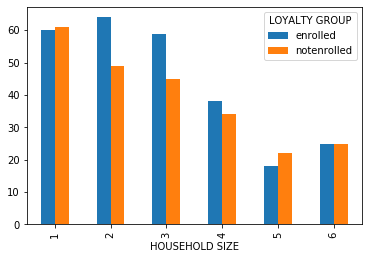

In [26]:
# household size vs loyalty 
loyalty_table = pd.crosstab(customer_all_view['HOUSEHOLD SIZE'], customer_all_view['LOYALTY GROUP'])
loyalty_table.plot(kind = 'bar')

customers whose household size is between 2 and 4 appear to be more interested in the loyalty program compared to other household sizes(1,5,6) who are indifferent.

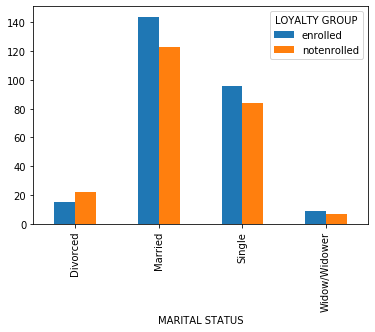

In [27]:
# marital status vs loyalty 
loyalty_table = pd.crosstab(customer_all_view['MARITAL STATUS'], customer_all_view['LOYALTY GROUP'])
loyalty_table.plot(kind = 'bar')

There's a small realtionship, small to mean almost indifferent. Customer who are married, single and widowed are more likely to enroll in the loyalty program. Divorced customers are more likely to not enroll in the loyalty program.

Text(0, 0.5, 'Number of customers')

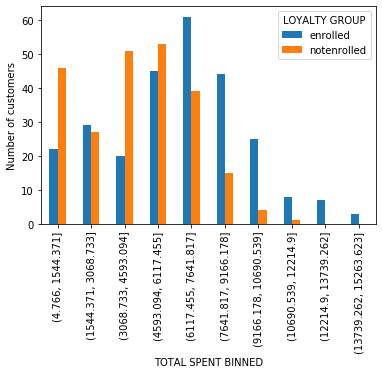

In [28]:
# total spent vs loyalty
customer_all_view['TOTAL SPENT BINNED'] = pd.cut(customer_all_view['TOTAL SPENT'],10)
loyalty_table = pd.crosstab(customer_all_view['TOTAL SPENT BINNED'], customer_all_view['LOYALTY GROUP'])
loyalty_table.plot(kind = 'bar')
plt.ylabel("Number of customers")

Those who spend more enroll more. This is supported by the observation that those who spend above $6117.46 have higher numbers of customers enrolled to the loyalty program, compared to those not enrolled.

### Factors affecting spending

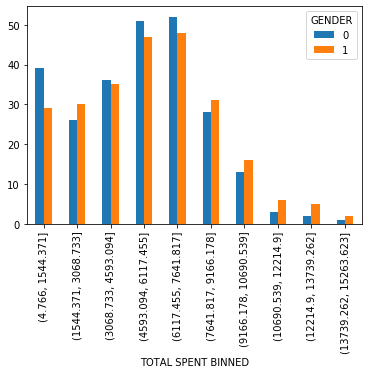

In [29]:
# gender vs total spent
spending_table = pd.crosstab(customer_all_view['TOTAL SPENT BINNED'], customer_all_view['GENDER'])
spending_table.plot(kind = 'bar')

Gender shows no clear relationship between spending and being male or female.In 4/10 of the bins gender 0 spent more in 6/10 gender 1 spent more so from the above chart we cannot say that being of gender 0 or 1 will determine how much you'll spend in general.

Text(0, 0.5, 'Total spent')

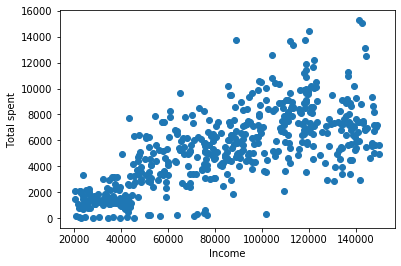

In [30]:
# income vs Total spent. Income is continuous hence we use a scatterplot
plt.scatter(customer_all_view['INCOME'], customer_all_view['TOTAL SPENT'])
plt.xlabel("Income")
plt.ylabel("Total spent")

In [31]:
# measure correlation using pearson correlation.
from scipy.stats import pearsonr
pearsonr(customer_all_view['INCOME'], customer_all_view['TOTAL SPENT'])

(0.6880311084625118, 2.3226326963807324e-71)

0.688 is an indication of a strong positive correlation; which then means as income increases so does spending. Income is a factor that affects spending.

In [32]:
pearsonr(customer_all_view['AGE'], customer_all_view['INCOME'])

(0.9417989049786017, 6.452902105194393e-238)

The relationship between age and income is very strong as proven by the pearson correlation.

Text(0, 0.5, 'Total spent')

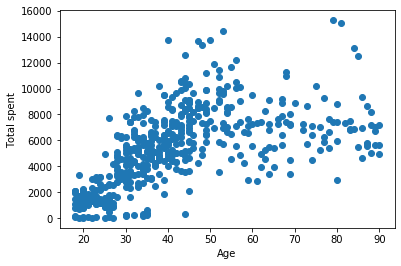

In [33]:
# age vs total spent. Age is continuous hence scatterplot
plt.scatter(customer_all_view['AGE'], customer_all_view['TOTAL SPENT'])
plt.xlabel("Age")
plt.ylabel("Total spent")

In [34]:
pearsonr(customer_all_view['AGE'], customer_all_view['TOTAL SPENT'])

(0.5760170677259264, 1.560821750278272e-45)

0.576 indicates a moderately strong. It indicates that as customers grow older they tend to spend more, which is quite normal in every society. As seen before age is highly correlated to income and therefore makes sense to see as age increases so does spending.

Text(0, 0.5, 'TOTAL SPENT')

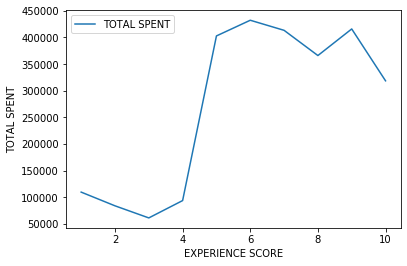

In [35]:
'''
experience score vs total spent. The data would be too messy to plot since we have 500 customers all with  
different experience scores therefore we sum up all that was spent by people who shared an experience score.
'''
spending_table = customer_all_view.groupby('EXPERIENCE SCORE').agg({'TOTAL SPENT': 'sum'})
spending_table.plot(kind = 'line')
plt.ylabel("TOTAL SPENT")

It is very clear that customers who had a good experience at the store spent more at the store. This is shown by the steep hike after the 4th score.

Text(0, 0.5, 'Number of customers')

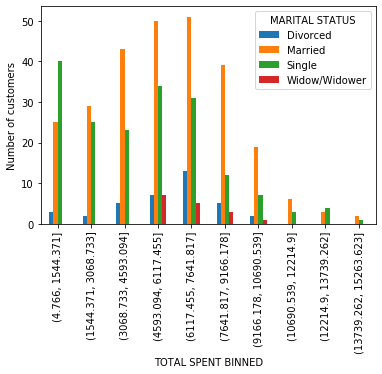

In [36]:
# marital status vs total spent
spending_table = pd.crosstab(customer_all_view['TOTAL SPENT BINNED'], customer_all_view['MARITAL STATUS'])
spending_table.plot(kind = 'bar')
plt.ylabel("Number of customers")

Divorced customers are the least spenders, followed by widowed customers. Retailer X's best customers are either married or single.

Text(0, 0.5, 'TOTAL SPENT')

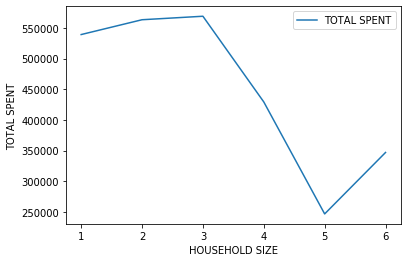

In [37]:
# household size vs total spent
spending_table = customer_all_view.groupby("HOUSEHOLD SIZE").agg({'TOTAL SPENT': 'sum'})
spending_table.plot(kind = 'line')
plt.ylabel("TOTAL SPENT")

Amount spent decreases with number of people in a household. Customer who come from households with 5 people spend the least, and customers from households with 3 people spend the most.

### CONCLUSION

**Factors affecting spending are:**
1. Household size
2. Marital status
3. Experience score
4. Age
5. Income


**Factors affecting loyalty are**
1. Total spent
2. Household size
3. Marital status
4. Experience score
5. Age

## Next we find the best model
### CLUSTERING
##### K-MEANS CLUSTERING

In [65]:
from sklearn.cluster import KMeans

In [66]:
# 1st grouping is according to income and total spent
cluster_input = customer_all_view[['INCOME', 'TOTAL SPENT']]
cluster_input.head()

,INCOME,TOTAL SPENT
0,133498,6826.770
1,94475,5062.451
2,88610,8562.440
3,84313,5522.694
4,51498,213.512


In [126]:
# The retailer insists on 4 groups of customers so divide into 4 clusters.
kmeans_model = KMeans(n_clusters = 4)

In [127]:
# run the kmeans clustering algorithm on the clusters input:
cluster_output = kmeans_model.fit_predict(cluster_input)
cluster_output

array([2, 0, 0, 0, 1, 2, 0, 3, 3, 0, 1, 3, 0, 0, 1, 0, 0, 3, 2, 0, 3, 3,
       3, 1, 3, 3, 0, 1, 1, 2, 0, 1, 1, 3, 1, 1, 1, 3, 3, 1, 1, 0, 0, 0,
       2, 1, 1, 0, 2, 1, 3, 1, 1, 1, 3, 1, 3, 3, 3, 1, 0, 3, 2, 3, 2, 0,
       0, 3, 1, 0, 0, 1, 0, 0, 2, 1, 0, 1, 0, 2, 0, 3, 2, 3, 1, 3, 2, 1,
       0, 1, 3, 2, 3, 3, 3, 0, 3, 1, 2, 3, 1, 1, 1, 1, 0, 3, 3, 1, 0, 1,
       1, 1, 0, 1, 3, 1, 2, 2, 0, 0, 1, 3, 3, 1, 0, 0, 3, 0, 1, 2, 0, 0,
       1, 0, 2, 3, 2, 2, 3, 0, 0, 1, 1, 1, 0, 3, 3, 1, 3, 0, 0, 3, 3, 3,
       0, 3, 1, 1, 3, 1, 2, 1, 2, 3, 1, 0, 1, 2, 0, 1, 2, 1, 3, 3, 2, 1,
       2, 2, 3, 1, 2, 1, 0, 1, 3, 2, 3, 3, 1, 2, 1, 3, 3, 2, 3, 2, 3, 2,
       3, 0, 3, 1, 2, 2, 3, 1, 0, 2, 2, 2, 2, 1, 3, 0, 2, 3, 1, 3, 0, 1,
       0, 1, 3, 1, 1, 1, 3, 1, 1, 0, 3, 0, 3, 0, 0, 1, 3, 2, 1, 1, 1, 0,
       0, 0, 0, 1, 3, 3, 2, 1, 0, 3, 1, 3, 1, 0, 1, 2, 3, 3, 1, 2, 1, 0,
       0, 2, 3, 0, 0, 3, 2, 1, 2, 1, 1, 1, 2, 0, 3, 3, 3, 0, 0, 0, 2, 0,
       3, 0, 3, 2, 2, 1, 1, 2, 1, 1, 1, 1, 0, 0, 1,

In [128]:
cluster_output = pd.DataFrame(cluster_output, columns = ['CLUSTER'])
cluster_output.tail()

,CLUSTER
495,3
496,3
497,3
498,1
499,0


In [129]:
# Now merge the first grouping with the segment:
cluster_in_out = pd.concat([cluster_input, cluster_output], axis =1)
cluster_in_out.tail()

,INCOME,TOTAL SPENT,CLUSTER
495,113125,8501.464,3
496,118108,9903.658,3
497,97353,6251.466,3
498,34424,20.010,1
499,75114,4182.032,0


In [130]:
# centroids
kmeans_model.cluster_centers_

array([[ 78670.37681159,   5394.79263043],
       [ 39991.43624161,   2424.81889933],
       [138629.34482759,   6996.87572414],
       [111271.84126984,   7779.87040476]])

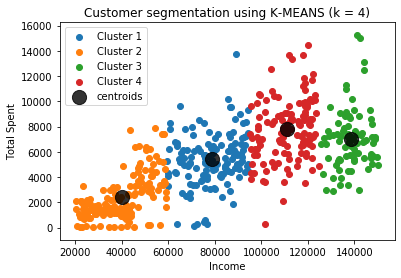

In [131]:
# plot the cluster results
plt.scatter(cluster_in_out[cluster_in_out.CLUSTER == 0]['INCOME'], cluster_in_out[cluster_in_out.CLUSTER == 0]['TOTAL SPENT'], label = 'Cluster 1')
plt.scatter(cluster_in_out[cluster_in_out.CLUSTER == 1]['INCOME'], cluster_in_out[cluster_in_out.CLUSTER == 1]['TOTAL SPENT'], label = 'Cluster 2')
plt.scatter(cluster_in_out[cluster_in_out.CLUSTER == 2]['INCOME'], cluster_in_out[cluster_in_out.CLUSTER == 2]['TOTAL SPENT'], label = 'Cluster 3')
plt.scatter(cluster_in_out[cluster_in_out.CLUSTER == 3]['INCOME'], cluster_in_out[cluster_in_out.CLUSTER == 3]['TOTAL SPENT'], label = 'Cluster 4')
# plot the centroids
plt.scatter(kmeans_model.cluster_centers_[:,0], kmeans_model.cluster_centers_[:,1], s = 200, c = 'black', alpha = 0.8, label = "centroids")

plt.title("Customer segmentation using K-MEANS (k = 4)")
plt.xlabel("Income")
plt.ylabel("Total Spent")
plt.legend()

Explore demographics of each cluster i.e. other factors that can give insight such as household size, martial status etc.

In [132]:
customer_demographics = pd.concat([customer_all_view, cluster_output], axis = 1)
customer_demographics.head()

,CUSTOMERID,GENDER,AGE,INCOME,EXPERIENCE SCORE,LOYALTY GROUP,ENROLLMENT DATE,HOUSEHOLD SIZE,MARITAL STATUS,APPAREL,ELECTRONICS,FOOD,HEALTH & BEAUTY,TOTAL SPENT,AGE BINNED,TOTAL SPENT BINNED,CLUSTER
0,10001,0,64,133498,5,enrolled,06-03-2013,4,Single,4022.430,1601.315,68.688,1134.337,6826.770,"(61.2, 68.4]","(6117.455, 7641.817]",2
1,10002,0,42,94475,9,notenrolled,0,6,Married,2312.509,2473.163,276.779,0.000,5062.451,"(39.6, 46.8]","(4593.094, 6117.455]",0
2,10003,0,40,88610,9,enrolled,02-09-2010,5,Married,2887.382,5414.418,260.640,0.000,8562.440,"(39.6, 46.8]","(7641.817, 9166.178]",0
3,10004,0,38,84313,8,enrolled,06-04-2015,1,Single,3637.213,1840.211,45.270,0.000,5522.694,"(32.4, 39.6]","(4593.094, 6117.455]",0
4,10005,0,30,51498,3,notenrolled,0,1,Single,213.512,0.000,0.000,0.000,213.512,"(25.2, 32.4]","(4.766, 1544.371]",1


In [133]:
# Find the average age and household size of each cluster.
customer_demographics.groupby('CLUSTER').agg({'AGE':'mean', 'HOUSEHOLD SIZE': 'median'})

,AGE,HOUSEHOLD SIZE
CLUSTER,,
0,36.311594,3
1,24.932886,2
2,73.609195,2
3,47.841270,3


In [134]:
# check rate of enrollment per cluster:
def percent_loyalty(series):
    percent = ((series.value_counts()['enrolled']/series.count())*100).round(2)
    return percent

In [167]:
customer_demographics.groupby("CLUSTER").agg({'AGE':'mean','INCOME': 'mean', 'EXPERIENCE SCORE': 'median','HOUSEHOLD SIZE': 'median','LOYALTY GROUP': percent_loyalty})

,AGE,INCOME,EXPERIENCE SCORE,HOUSEHOLD SIZE,LOYALTY GROUP
CLUSTER,,,,,
0,36.311594,78670.376812,6,3,34.06
1,24.932886,39991.436242,7,2,50.34
2,73.609195,138629.344828,7,2,65.52
3,47.841270,111271.841270,7,3,67.46


**Cluster 0:** made up of people averagely around 36.31 years old, live in a household of approximately 3 people. Only 34.06% of people in this cluster are interested in the loyalty program.

**Cluster 1:** made up of people around the age of 24.93, live in a household of approximately 2 people. 50.34% of people in this cluster are interested in the loyalty program.

**Cluster 2:** made up of people around the age of 73.61, live in a household of approximately 2 people. 65.52% of people in this cluster are interested in the loyalty program.

**Cluster 3:** made up of people around the age of 47.84, live in a household of approximately 3 people. 67.46% of people in this cluster are interested in the loyalty program.


**Retailer X should lighlty market to clusters 3 and 1(ages 47.84 and 73.61) to increase the number of customers in the loyalty group. They should however look for better ways to market the loyalty program better to the clusters clusters 0 and 2(ages 34.31 and 24.93).** It can also be observed that the groups with a higher income have enrolled more compared to those with a lower income.

Experience in the store does not g



## Hierarchical Clustering

In [81]:
from sklearn.cluster import AgglomerativeClustering

In [144]:
agglomerative_model = AgglomerativeClustering(n_clusters = 4)
agglomerative_model

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=4)

In [145]:
# same cluster input as before: income and total spent
h_cluster_output = agglomerative_model.fit_predict(cluster_input)
h_cluster_output

array([0, 3, 3, 3, 1, 0, 1, 0, 3, 1, 2, 3, 3, 3, 1, 3, 3, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 2, 2, 0, 1, 2, 2, 3, 2, 2, 1, 0, 0, 1, 2, 1, 1, 1,
       0, 2, 2, 1, 0, 1, 0, 2, 1, 1, 3, 2, 0, 0, 0, 2, 3, 0, 0, 0, 0, 1,
       3, 0, 2, 1, 1, 2, 1, 1, 0, 2, 3, 2, 1, 0, 1, 0, 0, 0, 1, 3, 0, 1,
       3, 2, 0, 0, 0, 0, 0, 1, 3, 1, 0, 0, 2, 2, 1, 2, 1, 3, 0, 2, 1, 1,
       2, 2, 1, 2, 3, 1, 0, 0, 1, 1, 2, 3, 0, 2, 3, 1, 0, 1, 2, 0, 1, 3,
       1, 3, 0, 3, 0, 0, 0, 1, 1, 2, 1, 2, 1, 0, 3, 2, 3, 1, 3, 0, 0, 0,
       3, 3, 1, 1, 0, 2, 0, 2, 0, 0, 1, 1, 2, 0, 1, 2, 0, 2, 0, 3, 0, 1,
       0, 0, 3, 2, 0, 1, 1, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 3, 0, 0, 0,
       0, 3, 3, 2, 0, 0, 3, 2, 3, 0, 0, 0, 0, 2, 0, 1, 0, 0, 1, 3, 1, 1,
       1, 2, 0, 1, 1, 1, 0, 2, 2, 3, 3, 1, 0, 3, 3, 2, 0, 0, 1, 1, 2, 1,
       3, 3, 1, 2, 0, 0, 0, 2, 1, 0, 1, 0, 2, 1, 2, 0, 0, 3, 2, 0, 1, 3,
       3, 0, 3, 1, 1, 0, 0, 1, 0, 1, 2, 1, 0, 1, 0, 0, 3, 3, 1, 3, 0, 1,
       0, 3, 0, 0, 0, 2, 2, 0, 2, 1, 2, 2, 1, 3, 2,

In [146]:
h_cluster_output = pd.DataFrame(h_cluster_output, columns = ['CLUSTER'])
h_cluster_output.head()

,CLUSTER
0,0
1,3
2,3
3,3
4,1


In [147]:
h_cluster_in_out = pd.concat([cluster_input, h_cluster_output], axis =1)
h_cluster_in_out.head()

,INCOME,TOTAL SPENT,CLUSTER
0,133498,6826.770,0
1,94475,5062.451,3
2,88610,8562.440,3
3,84313,5522.694,3
4,51498,213.512,1


In [148]:
# explore relationships per cluster
h_customer_demographics = pd.concat([customer_all_view, h_cluster_output], axis = 1)
h_customer_demographics.head()

,CUSTOMERID,GENDER,AGE,INCOME,EXPERIENCE SCORE,LOYALTY GROUP,ENROLLMENT DATE,HOUSEHOLD SIZE,MARITAL STATUS,APPAREL,ELECTRONICS,FOOD,HEALTH & BEAUTY,TOTAL SPENT,AGE BINNED,TOTAL SPENT BINNED,CLUSTER
0,10001,0,64,133498,5,enrolled,06-03-2013,4,Single,4022.430,1601.315,68.688,1134.337,6826.770,"(61.2, 68.4]","(6117.455, 7641.817]",0
1,10002,0,42,94475,9,notenrolled,0,6,Married,2312.509,2473.163,276.779,0.000,5062.451,"(39.6, 46.8]","(4593.094, 6117.455]",3
2,10003,0,40,88610,9,enrolled,02-09-2010,5,Married,2887.382,5414.418,260.640,0.000,8562.440,"(39.6, 46.8]","(7641.817, 9166.178]",3
3,10004,0,38,84313,8,enrolled,06-04-2015,1,Single,3637.213,1840.211,45.270,0.000,5522.694,"(32.4, 39.6]","(4593.094, 6117.455]",3
4,10005,0,30,51498,3,notenrolled,0,1,Single,213.512,0.000,0.000,0.000,213.512,"(25.2, 32.4]","(4.766, 1544.371]",1


In [149]:
h_customer_demographics.groupby('CLUSTER').agg({'AGE':'mean', 'HOUSEHOLD SIZE': 'median'})

,AGE,HOUSEHOLD SIZE
CLUSTER,,
0,61.382022,3
1,32.430769,3
2,22.620000,2
3,40.804348,4


In [163]:
h_customer_demographics.groupby('CLUSTER').agg({'AGE':'mean', 'HOUSEHOLD SIZE': 'median', 'LOYALTY GROUP': percent_loyalty})

,AGE,HOUSEHOLD SIZE,LOYALTY GROUP
CLUSTER,,,
0,61.382022,3,70.22
1,32.430769,3,33.85
2,22.620000,2,58.00
3,40.804348,4,40.22


**Cluster 0:** made up of people averagely aged 61.38 years, have the highest income among the 4 clusters and live in a household with approximately 3 people. 70.22% of customers in this cluster are enrolled in the loyalty program.

**Cluster 1:** made up of customers averagely aged 32.43, live in a household with approximately 3 people and only 33.85% of customers in this cluster have enrolled in the loyalty program.

**Cluster 2:** made up customers averagely aged 22.62, have the least income among the 4 clusters and live in a household with approximately 2 people. 58% of people in this group are enrolled in the loyalty program.

**Cluster 3:** made up of people averagely aged 40.80, live in a household with approximately 4 people. 40.22% of customers in this cluster have enrolled in the loyalty program.

**From Hierarchical clustering, the results indicate that the loyalty program should be lightly marketed to clusters 0 and 2(ages 61.38 and 22.62), to increase their numbers because they are more receptive to the program. More should be invested in marketing to people in clusters 1 and 3(ages 32.43 and 40.80).**


The other factors affecting loyalty don't seem to give any meaningful insight, i.e. Marital status, total spent and experience score.

## Classification